In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('..\\data\\random_states_results.csv')
df = df.drop(['Unnamed: 0','time'],axis=1)

In [3]:
df = df[df.results.notna()]

In [4]:
df = df.drop(df[df.results == 'Time limit reached.\r\n'].index)
df = df.drop(df[df.results == 'No solution exists.\r\n'].index)
df = df.drop(df[df.results == 'key_action1(char_acting)\r\n'].index)
df = df.drop(df[df.results == 'key_action2(char_acting)\r\n'].index)
df = df.drop(df[df.results == 'key_action3(char_acting)\r\n'].index)
#df = df.drop(df[df.results == 'unblock_yourself(char_acting)'].index)
df.reset_index(inplace=True,drop=True)


In [5]:
df

,char_acting_health,char_acting_knowledge,char_acting_altruism,char_acting_ambition,char_acting_support,char_acting_money,char_acting_satisfaction,char_acting_state,char_acting_relation_char1,char_acting_supports_char1,...,char2_satisfaction,char2_state,char2_relation_char_acting,char2_supports_char_acting,char2_relation_char1,char2_supports_char1,ship_defense,ship_status,ship_magic,results
0,2,2,2,1,0,1,0,blocked,1,1,...,0,blocked,2,0,-1,0,0,1,-1,unblock_yourself(char_acting) change_ship_magi...
1,2,2,0,0,1,1,0,blocked,1,1,...,0,?,1,1,2,1,0,0,-1,unblock_yourself(char_acting) change_ship_stat...
2,2,1,2,3,0,1,0,hidden,2,1,...,0,hidden,-1,0,-1,0,1,-1,-1,"change_health_up(char_acting, char_acting) key..."
3,2,1,0,2,0,0,0,blocked,-1,1,...,0,hidden,-2,0,-1,0,0,-1,1,unblock_yourself(char_acting) change_ship_stat...
4,1,0,2,4,0,0,0,hidden,-2,0,...,0,blocked,0,1,0,0,1,1,-1,change_knowledge_up(char_acting) change_knowle...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,1,2,1,4,0,0,0,blocked,2,0,...,0,?,-1,0,-1,1,-1,-1,1,unblock_yourself(char_acting) key_action2(char...
2992,1,0,1,0,1,1,0,blocked,-2,1,...,0,blocked,-1,0,2,0,0,0,1,unblock_yourself(char_acting) change_ship_stat...
2993,1,1,-1,3,1,1,0,hidden,-2,0,...,0,blocked,-1,0,0,0,1,1,1,"change_health_up(char_acting, char_acting) cha..."
2994,1,0,2,0,1,1,0,blocked,0,0,...,0,hidden,1,0,0,0,0,-1,0,unblock_yourself(char_acting) change_ship_magi...


In [6]:

action = df.at[1,'results'].split(' ')[0]
action = action.replace('(',' ')
action = action.split(' ')
print(action)
only_action = action[0]
variables = action[1][:-1].split(', ')

print(only_action)
print(variables)

['unblock_yourself', 'char_acting)']
unblock_yourself
['char_acting']


In [7]:
df_effects = pd.read_csv('..\data\effects_nn.csv')

In [8]:
df_effects

,action,effect,effect_function
0,change_health_down,health(char2) - 1,arg2_health:-_1
1,change_health_up,health(char2) + 1,arg2_health:+_1
2,change_knowledge_down,knowledge(char2) - 1,arg2_knowledge:-_1
3,change_knowledge_up,knowledge(char) + 1,arg1_knowledge:+_1
4,change_relation_down,"relation(char2,char3) - 1;health(char) - 1",arg2_relation_arg3:-_1;\r\narg1_health:-_1
5,change_relation_up,"relation(char2,char3) + 1",arg2_relation_arg3:+_1
6,hide,state(char) = hidden,arg1_state:=_hidden
7,find,state(char2) = ?,arg2_state:=_?
8,block,state(char2) = blocked,arg2_state:=_blocked
9,unblock,state(char2) = ?,arg2_state:=_?


In [9]:
def create_result(df ,row):
    
    
    actions = row.results.split(' ')

    for action in actions:
        action = action.replace('(',' ')
        action = action.split(' ')
        
        only_action = action[0]
        variables = action[1][:-1].split(', ')
        new_row = row
        effects= df_effects[df_effects.action == only_action].effect
        
        if len(effects) > 0:
            for effect in str(effects.values[0]).split(';'):
                new_row.results = effect 
                df.loc[len(df)] = new_row

        #df.drop(index)
        return only_action
        #musi być action_variables albo najlepiej co się zmienia
    

In [10]:
df2 = pd.DataFrame(columns = df.columns)
for index, row in df.iterrows():
    create_result(df2,row)
    
#df['result'] = df.apply(create_result,axis=1)
#df = df.drop(['results'],axis=1)

df = df2
df.rename({'results':'result'},axis=1,inplace=True)


In [11]:

df

,char_acting_health,char_acting_knowledge,char_acting_altruism,char_acting_ambition,char_acting_support,char_acting_money,char_acting_satisfaction,char_acting_state,char_acting_relation_char1,char_acting_supports_char1,...,char2_satisfaction,char2_state,char2_relation_char_acting,char2_supports_char_acting,char2_relation_char1,char2_supports_char1,ship_defense,ship_status,ship_magic,result
0,2,2,2,1,0,1,0,blocked,1,1,...,0,blocked,2,0,-1,0,0,1,-1,state(char) = ?
1,2,2,0,0,1,1,0,blocked,1,1,...,0,?,1,1,2,1,0,0,-1,state(char) = ?
2,2,1,2,3,0,1,0,hidden,2,1,...,0,hidden,-1,0,-1,0,1,-1,-1,health(char2) + 1
3,2,1,0,2,0,0,0,blocked,-1,1,...,0,hidden,-2,0,-1,0,0,-1,1,state(char) = ?
4,1,0,2,4,0,0,0,hidden,-2,0,...,0,blocked,0,1,0,0,1,1,-1,knowledge(char) + 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,1,2,1,4,0,0,0,blocked,2,0,...,0,?,-1,0,-1,1,-1,-1,1,state(char) = ?
3052,1,0,1,0,1,1,0,blocked,-2,1,...,0,blocked,-1,0,2,0,0,0,1,state(char) = ?
3053,1,1,-1,3,1,1,0,hidden,-2,0,...,0,blocked,-1,0,0,0,1,1,1,health(char2) + 1
3054,1,0,2,0,1,1,0,blocked,0,0,...,0,hidden,1,0,0,0,0,-1,0,state(char) = ?


In [12]:
#categorical = [x for x in df.columns if df[x].dtype == 'object' and x != 'result'] 
categorical = ['char_acting_state','char1_state','char2_state'] 
print(categorical)

['char_acting_state', 'char1_state', 'char2_state']


In [13]:
from sklearn.preprocessing import OneHotEncoder
from collections import defaultdict

#d = defaultdict(OneHotEncoder)


# Encoding the variable
#df = df.apply(lambda x: d[x.name].fit_transform(x))
# Inverse the encoded
#df.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
#df.apply(lambda x: d[x.name].transform(x))

df = pd.get_dummies(df, columns = categorical)



In [14]:
df.result.value_counts()

state(char) = ?              1171
ship_magic(world) + 1         861
ship_status(world) + 1        486
health(char2) + 1             293
knowledge(char) + 1            94
relation(char2,char3) - 1      60
health(char) - 1               60
state(char) = hidden           31
Name: result, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [16]:
features = ['char_acting_altruism',	'char_acting_ambition','char_acting_fighting_ability']

#df2 = df[features]
df2 = df

In [17]:
df2

,char_acting_health,char_acting_knowledge,char_acting_altruism,char_acting_ambition,char_acting_support,char_acting_money,char_acting_satisfaction,char_acting_relation_char1,char_acting_supports_char1,char_acting_relation_char2,...,result,char_acting_state_?,char_acting_state_blocked,char_acting_state_hidden,char1_state_?,char1_state_blocked,char1_state_hidden,char2_state_?,char2_state_blocked,char2_state_hidden
0,2,2,2,1,0,1,0,1,1,-1,...,state(char) = ?,0,1,0,0,0,1,0,1,0
1,2,2,0,0,1,1,0,1,1,-1,...,state(char) = ?,0,1,0,1,0,0,1,0,0
2,2,1,2,3,0,1,0,2,1,0,...,health(char2) + 1,0,0,1,0,1,0,0,0,1
3,2,1,0,2,0,0,0,-1,1,-1,...,state(char) = ?,0,1,0,0,1,0,0,0,1
4,1,0,2,4,0,0,0,-2,0,-2,...,knowledge(char) + 1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,1,2,1,4,0,0,0,2,0,1,...,state(char) = ?,0,1,0,0,1,0,1,0,0
3052,1,0,1,0,1,1,0,-2,1,-1,...,state(char) = ?,0,1,0,0,0,1,0,1,0
3053,1,1,-1,3,1,1,0,-2,0,-2,...,health(char2) + 1,0,0,1,0,0,1,0,1,0
3054,1,0,2,0,1,1,0,0,0,-2,...,state(char) = ?,0,1,0,0,1,0,0,0,1


In [18]:
y = df.result
X = df2.drop('result',axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [20]:
clf = DecisionTreeClassifier(random_state=12345, max_depth=5,class_weight='balanced') 
model = clf.fit(X_train,y_train)
y_pred = model.predict(X_test)
# get importance


In [21]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8104575163398693


<AxesSubplot: >

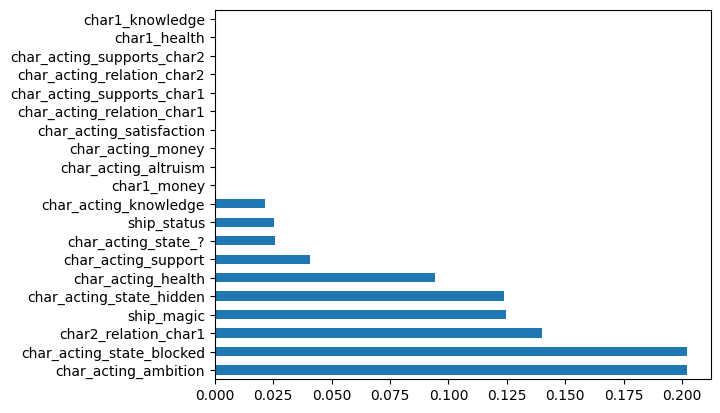

In [22]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [23]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 if v > 0:
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


Feature: 0, Score: 0.09439
Feature: 1, Score: 0.02142
Feature: 3, Score: 0.20217
Feature: 4, Score: 0.04079
Feature: 16, Score: 0.00000
Feature: 31, Score: 0.13990
Feature: 34, Score: 0.02513
Feature: 35, Score: 0.12468
Feature: 36, Score: 0.02556
Feature: 37, Score: 0.20217
Feature: 38, Score: 0.12377


In [24]:
[str(x) for x  in list(y.unique())]

['state(char) = ?',
 'health(char2) + 1',
 'knowledge(char) + 1',
 'ship_status(world) + 1',
 'ship_magic(world) + 1',
 'relation(char2,char3) - 1',
 'health(char) - 1',
 'state(char) = hidden']

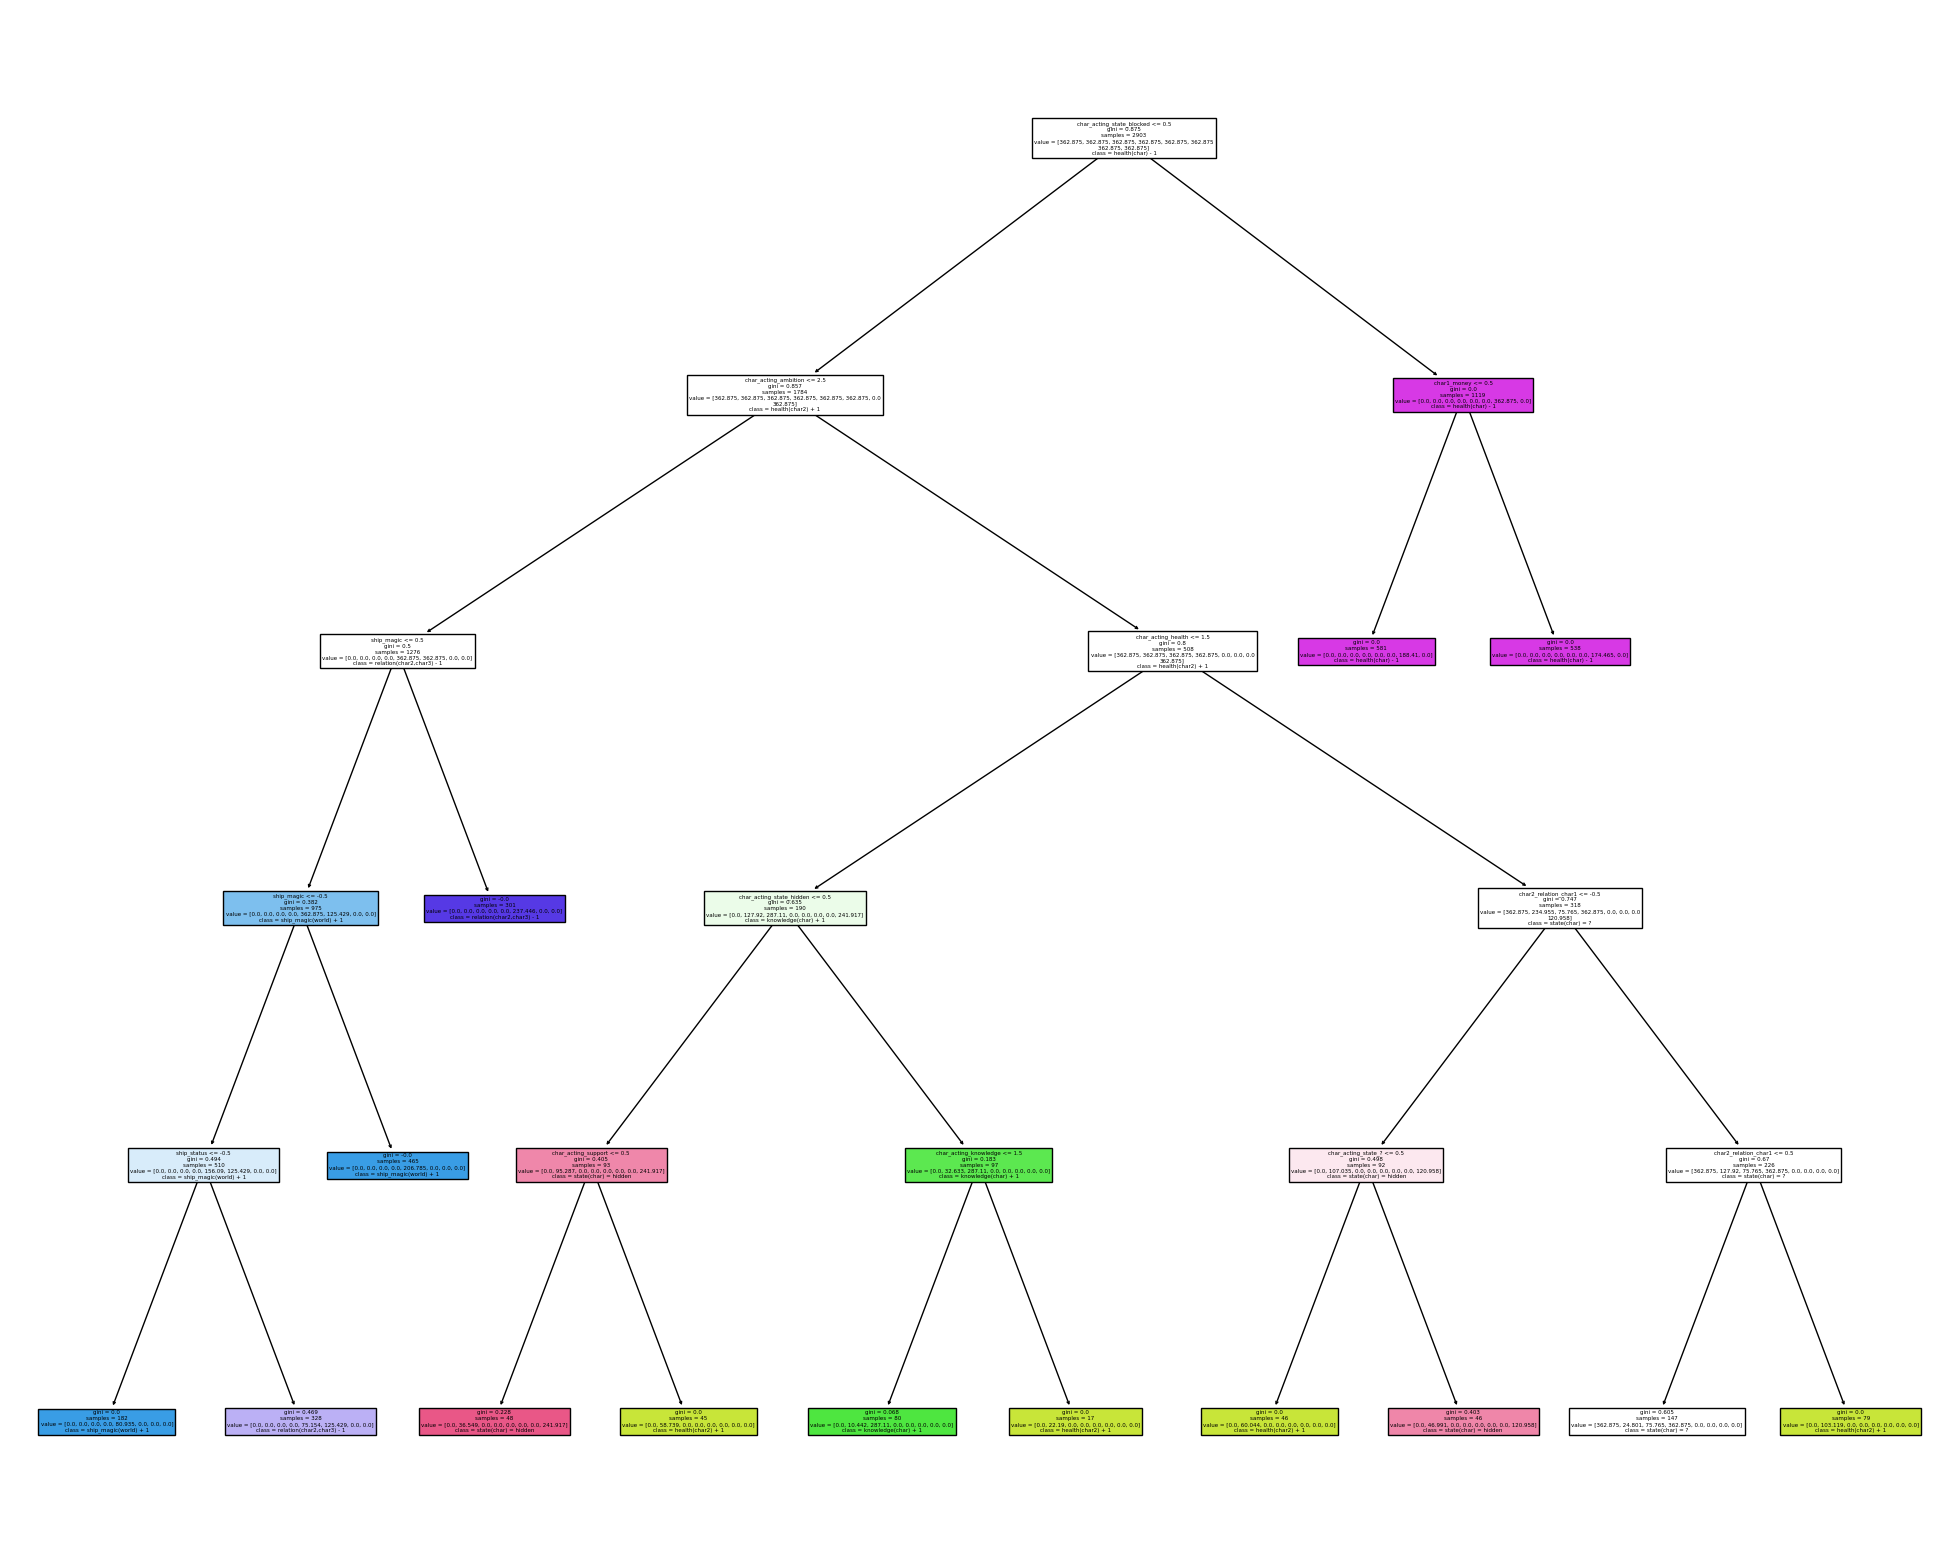

In [25]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=[str(x) for x  in list(y.unique())],
                   filled=True)

In [26]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names,pr):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths, pr):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths,pr)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths,pr)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths,pr)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "

        classes = path[-1][0][0]
        l = np.argmax(classes)
        proba = np.round(100.0*classes[l]/np.sum(classes),2)

        

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            
            rule += f"class: {class_names[l]} (proba: {proba}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        if(proba >= pr):  rules += [rule]
        
    return rules

In [27]:
rules = get_rules(clf, X.columns, [str(x) for x  in list(y.unique())],75)

for r in rules:
    print(r)

if (char_acting_state_blocked > 0.5) and (char1_money <= 0.5) then class: health(char) - 1 (proba: 100.0%) | based on 581 samples
if (char_acting_state_blocked > 0.5) and (char1_money > 0.5) then class: health(char) - 1 (proba: 100.0%) | based on 538 samples
if (char_acting_state_blocked <= 0.5) and (char_acting_ambition <= 2.5) and (ship_magic <= 0.5) and (ship_magic > -0.5) then class: ship_magic(world) + 1 (proba: 100.0%) | based on 465 samples
if (char_acting_state_blocked <= 0.5) and (char_acting_ambition <= 2.5) and (ship_magic > 0.5) then class: relation(char2,char3) - 1 (proba: 100.0%) | based on 301 samples
if (char_acting_state_blocked <= 0.5) and (char_acting_ambition <= 2.5) and (ship_magic <= 0.5) and (ship_magic <= -0.5) and (ship_status <= -0.5) then class: ship_magic(world) + 1 (proba: 100.0%) | based on 182 samples
if (char_acting_state_blocked <= 0.5) and (char_acting_ambition > 2.5) and (char_acting_health <= 1.5) and (char_acting_state_hidden > 0.5) and (char_acting

In [28]:
import tensorflow_decision_forests as tfdf

import tensorflow as tf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

import dtreeviz

from matplotlib import pyplot as plt
from IPython import display

ModuleNotFoundError: No module named 'tensorflow_decision_forests'

In [ ]:
def split_dataset(dataset, test_ratio=0.30, seed=1234):
  """
  Splits a panda dataframe in two, usually for train/test sets.
  Using the same random seed ensures we get the same split so
  that the description in this tutorial line up with generated images.
  """
  np.random.seed(seed)
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

In [ ]:
label = "result"   # Name of the classification target label
classes = list(df[label].unique())
df[label] = df[label].map(classes.index)

print(f"Target '{label}'' classes: {classes}")
df.head(3)

In [ ]:
# Split into training and test sets
train_ds_pd, test_ds_pd = split_dataset(df)
print(f"{len(train_ds_pd)} examples in training, {len(test_ds_pd)} examples for testing.")

# Convert to tensorflow data sets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [ ]:
cmodel = tfdf.keras.RandomForestModel(verbose=0, random_seed=1234)
cmodel.fit(train_ds)

In [ ]:
cmodel.compile(metrics=["accuracy"])
cmodel.evaluate(test_ds, return_dict=True, verbose=0)

In [ ]:
# Tell dtreeviz about training data and model
features = [f.name for f in cmodel.make_inspector().features()]
viz_cmodel = dtreeviz.model(cmodel,
                           tree_index=3,
                           X_train=train_ds_pd[features],
                           y_train=train_ds_pd[label],
                           feature_names=features,
                           target_name=label,
                           class_names=classes)

In [ ]:
viz_cmodel.view(scale=1.2)

In [ ]:
print(viz_rmodel.explain_prediction_path(x=x))

In [ ]:
characters = ['mc','actor','actress','soldier']
lists = []
columns = []
columns.append('character')
for c in characters:
    
    

    columns.append(c+"_health")
    lists.append([i for i in range(0,3)])

    columns.append(c+"_knowledge")
    lists.append([i for i in range(0,3)])

   

    columns.append(c+"_altruism")
    lists.append([i for i in range(-2,3)])
    columns.append(c+"_ambition")
    lists.append([i for i in range(0,5)])
    
    columns.append(c+"_support")
    lists.append([i for i in range(0,2)])

    columns.append(c+"_money")
    lists.append([i for i in range(0,2)])
    
    columns.append(c+"_satisfaction")
    lists.append([0])

    columns.append(c+"_state")
    lists.append(['?','blocked','hidden'])

    char_without_c = characters.copy()
    char_without_c.remove(c)
    for c2 in char_without_c:
        columns.append(c+"_relation_"+c2)
        lists.append([i for i in range(-2,3)])
        columns.append(c+"_supports_"+c2)
        lists.append([0,1])

columns.append("ship_defense")
lists.append([-1,0,1])

columns.append("ship_status")
lists.append([-1,0,1])

columns.append("ship_magic")
lists.append([-1,0,1])

df_state = pd.DataFrame( columns=columns )
df_state

d = []
d.append('world')
for l in lists:
    d.append(random.choice(l))
df_state.loc[len(df_state)] = d

for entity in characters:
    d[0] = entity
   
    
    df_state.loc[len(df_state)] = d
    


    

In [ ]:
df_state

,character,mc_health,mc_knowledge,mc_altruism,mc_ambition,mc_support,mc_money,mc_satisfaction,mc_state,mc_relation_actor,...,soldier_state,soldier_relation_mc,soldier_supports_mc,soldier_relation_actor,soldier_supports_actor,soldier_relation_actress,soldier_supports_actress,ship_defense,ship_status,ship_magic
0,world,1,1,2,0,1,0,0,?,2,...,hidden,-1,1,-1,0,2,1,-1,-1,-1
1,mc,1,1,2,0,1,0,0,?,2,...,hidden,-1,1,-1,0,2,1,-1,-1,-1
2,actor,1,1,2,0,1,0,0,?,2,...,hidden,-1,1,-1,0,2,1,-1,-1,-1
3,actress,1,1,2,0,1,0,0,?,2,...,hidden,-1,1,-1,0,2,1,-1,-1,-1
4,soldier,1,1,2,0,1,0,0,?,2,...,hidden,-1,1,-1,0,2,1,-1,-1,-1
